# I. Importing the datasets to Python

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#Importing Value_info table - pls note that I've split my main excel into different excel sheets before importing
value_data = pd.read_excel('Value_info.xlsx')

In [3]:
value_data.head(15)

,Customer ID,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions
0,1,8.97261,5.307720,1,6.600000
1,2,7.92288,70.156800,7,6.639453
2,3,14.06160,50.803200,7,0.000000
3,4,14.07672,0.000000,0,0.000000
4,5,22.68000,68.221440,9,14.771948
5,6,3.78000,34.110720,3,1.598552
6,7,10.20600,0.000000,0,0.552120
7,8,23.67792,48.771072,8,0.000000
8,9,13.56300,70.752000,5,0.000000
9,10,11.97000,9.324000,1,4.188882


In [4]:
#Importing Demographic_info
demographic_data = pd.read_excel('Demographic_info.xlsx')

In [5]:
demographic_data.head(15)

,Customer ID,Title,Date Of Birth,Address City,Contact Allowed,Registration Date,Source of Customer
0,1,Mr,1973-06-29,Malahide,Y,2013-01-01 00:23:00,Organic Search
1,2,Mr,1984-07-25,Dublin,Y,2013-01-01 00:30:00,Affiliates
2,3,Mr,1991-05-01,Dublin,Y,2013-01-01 01:09:00,Paid Social
3,4,Mr,1986-11-30,Dublin,N,2013-01-01 01:19:00,Affiliates
4,5,Mr,1991-10-02,Limerick,Y,2013-01-01 01:58:00,Paid Search
5,6,Mr,1986-05-03,Dublin,N,2013-01-01 02:11:00,Direct
6,7,Mr,1972-05-16,Dublin,N,2013-01-01 02:29:00,Organic Search
7,8,Mr,1976-04-06,Dublin,N,2013-01-01 02:54:00,Paid Social
8,9,Mrs,1965-03-12,Dublin,Y,2013-01-01 05:04:00,Paid Search
9,10,Ms,1989-01-07,Dungarvan,Y,2013-01-01 09:43:00,Paid Search


# II. Preparing Data

## 1. Value_info Table:

#### 1.1 Checking if there's any missing values for all columns:

In [6]:
missing_value = value_data.isnull().sum()
print(missing_value)

Customer ID                      0
1st Order Profit                 0
Subsequent Order Profit          0
Subsequent Orders Count          0
Total value of all promotions    0
dtype: int64


In [7]:
value_data.shape

(30591, 5)

In [8]:
value_data['Customer ID'].nunique()

30591

#### 1.2 Checking the data types of all the columns and converting to relevant data types

In [9]:
value_data.dtypes

Customer ID                        int64
1st Order Profit                 float64
Subsequent Order Profit          float64
Subsequent Orders Count            int64
Total value of all promotions    float64
dtype: object

#### 1.3 Checking if there are any duplicate rows

In [10]:
duplicates = value_data.duplicated()
value_data[duplicates]

,Customer ID,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions


#### 1.4 Checking if there are any outliers 

In [11]:
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

print("\nOutliers in Value Data:")
print(detect_outliers(value_data.select_dtypes(include=['float64', 'int64'])).sum())


Outliers in Value Data:
Customer ID                         0
1st Order Profit                  493
Subsequent Order Profit          1238
Subsequent Orders Count           182
Total value of all promotions    2848
dtype: int64


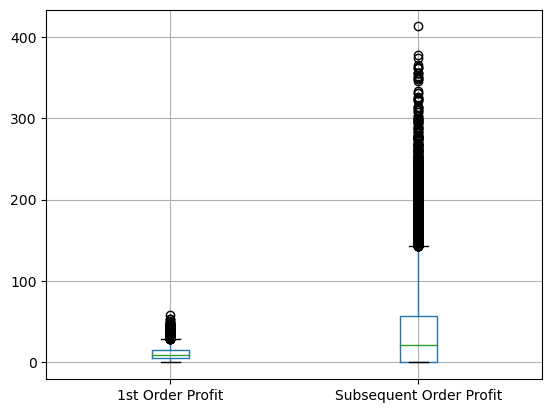

In [12]:
value_data.boxplot(column=['1st Order Profit','Subsequent Order Profit'])
plt.show()

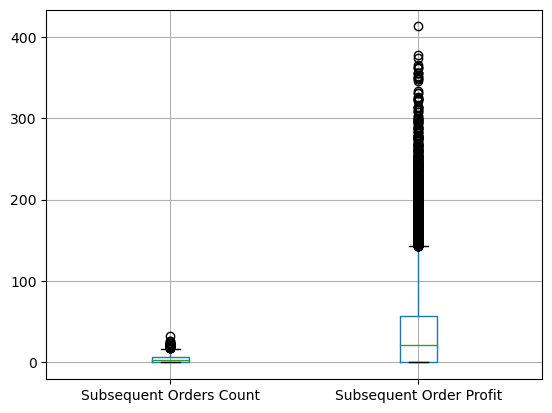

In [13]:
value_data.boxplot(column=['Subsequent Orders Count','Subsequent Order Profit'])
plt.show()

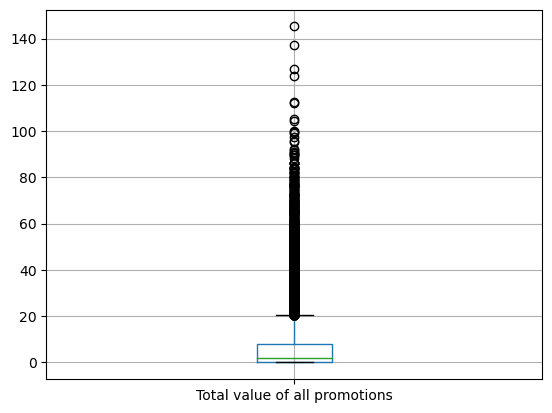

In [14]:
value_data.boxplot(column=['Total value of all promotions'])
plt.show()

As we can see there are outliers, we will be handling them along with other features below when we do clustering.

#### 1.5 Checking Data Integrity:

In [15]:
#Subsequent Order counts has to be > 0 
invalid_order_counts = value_data[value_data['Subsequent Orders Count'] < 0]
print("\nInvalid Subsequent Orders Count:")
print(invalid_order_counts)


Invalid Subsequent Orders Count:
Empty DataFrame
Columns: [Customer ID, 1st Order Profit, Subsequent Order Profit, Subsequent Orders Count, Total value of all promotions]
Index: []


In [16]:
#Subsequent Order Profit counts has to be > 0 
invalid_order_counts = value_data[value_data['Subsequent Order Profit'] < 0]
print("\nInvalid Subsequent Orders Count:")
print(invalid_order_counts)


Invalid Subsequent Orders Count:
Empty DataFrame
Columns: [Customer ID, 1st Order Profit, Subsequent Order Profit, Subsequent Orders Count, Total value of all promotions]
Index: []


In [17]:
#1st Order Profit counts has to be > 0 
invalid_order_counts = value_data[value_data['Subsequent Order Profit'] < 0]
print("\nInvalid Subsequent Orders Count:")
print(invalid_order_counts)


Invalid Subsequent Orders Count:
Empty DataFrame
Columns: [Customer ID, 1st Order Profit, Subsequent Order Profit, Subsequent Orders Count, Total value of all promotions]
Index: []


#### Note: Total values of all promotions is the short loss the company is facing due to promotional offers. By examning the data, we have positive and negative values for this, the positive values indicates the loss and negative values here could indicate the profit instead of the loss - if a customer hasn't availed the offers 

#### 1.6 Checking if any data aggregation can be done

We can find the TotalProfit made from a customer -> 1st order profit + Subsequent Order profit and we can also find the TotalOrders made from a customer -> Subsequent order's profit + 1 (please note that these data is till June 30th)

In [18]:
#Calculating TotalProfit from each customer for the company
value_data['Total Profit'] = (value_data['1st Order Profit'] + value_data['Subsequent Order Profit']) - value_data['Total value of all promotions']


#Calculating TotalOrders for each customer
value_data['Total Orders'] = value_data['Subsequent Orders Count'] + 1

In [19]:
value_data.head(15)

,Customer ID,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions,Total Profit,Total Orders
0,1,8.97261,5.307720,1,6.600000,7.680330,2
1,2,7.92288,70.156800,7,6.639453,71.440227,8
2,3,14.06160,50.803200,7,0.000000,64.864800,8
3,4,14.07672,0.000000,0,0.000000,14.076720,1
4,5,22.68000,68.221440,9,14.771948,76.129492,10
5,6,3.78000,34.110720,3,1.598552,36.292168,4
6,7,10.20600,0.000000,0,0.552120,9.653880,1
7,8,23.67792,48.771072,8,0.000000,72.448992,9
8,9,13.56300,70.752000,5,0.000000,84.315000,6
9,10,11.97000,9.324000,1,4.188882,17.105118,2


## 2. Demographic_info Table:

#### 2.1 Checking if there's any missing values for all columns:

In [20]:
missing_value = demographic_data.isnull().sum()
print(missing_value)

Customer ID              0
Title                 4078
Date Of Birth            0
Address City             0
Contact Allowed          0
Registration Date        0
Source of Customer       0
dtype: int64


In [21]:
demographic_data['Title'].unique()

array(['Mr', 'Mrs', 'Ms', nan, 'Miss'], dtype=object)

Here, we see Ms and Miss are the same title, so I will club those values to "Miss". And for nan values, we put a placeholder as unknown.

In [22]:
demographic_data['Title'] = demographic_data['Title'].replace('Ms', 'Miss')
demographic_data['Title'].fillna('Unknown', inplace=True)

In [23]:
demographic_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Unknown'], dtype=object)

#### 2.2 Checking the data types of all the columns and converting to relevant data types

In [24]:
demographic_data.dtypes

Customer ID                    int64
Title                         object
Date Of Birth         datetime64[ns]
Address City                  object
Contact Allowed               object
Registration Date     datetime64[ns]
Source of Customer            object
dtype: object

#### 2.3 Checking if there are any duplicate rows

In [25]:
duplicates = demographic_data.duplicated()
demographic_data[duplicates]

,Customer ID,Title,Date Of Birth,Address City,Contact Allowed,Registration Date,Source of Customer


#### 2.4 Not checking for outliers here as they have categorical data

#### 2.5 Checking Data Integrity:

In [26]:
#Firstly checking if all customer ID of demo_info is present in value_info
missing_ids = demographic_data[~demographic_data['Customer ID'].isin(value_data['Customer ID'])]['Customer ID']

if len(missing_ids) == 0:
    print("All Customer IDs in demographic_data are present in value_data.")
else:
    print(f"The following Customer IDs in demographic_data are not present in value_data: {missing_ids.tolist()}")

The following Customer IDs in demographic_data are not present in value_data: [14, 38, 64, 125, 149, 175, 236, 260, 286, 347, 371, 397, 458, 482, 508, 569, 593, 619, 680, 704, 730, 791, 815, 841, 902, 926, 952, 1013, 1037, 1063, 1124, 1148, 1174, 1235, 1259, 1285, 1346, 1370, 1396, 1457, 1481, 1507, 1568, 1592, 1618, 1679, 1703, 1729, 1790, 1814, 1840, 1901, 1925, 1951, 2012, 2036, 2062, 2123, 2147, 2173, 2234, 2258, 2284, 2345, 2369, 2395, 2456, 2480, 2506, 2567, 2591, 2617, 2678, 2702, 2728, 2789, 2813, 2839, 2900, 2924, 2950, 3011, 3035, 3061, 3122, 3146, 3172, 3233, 3257, 3283, 3344, 3368, 3394, 3455, 3479, 3505, 3566, 3590, 3616, 3677, 3701, 3727, 3788, 3812, 3838, 3899, 3923, 3949, 4010, 4034, 4060, 4121, 4145, 4171, 4232, 4256, 4282, 4343, 4367, 4393, 4454, 4478, 4504, 4565, 4589, 4615, 4676, 4700, 4726, 4787, 4811, 4837, 4898, 4922, 4948, 5009, 5033, 5059, 5120, 5144, 5170, 5231, 5255, 5281, 5342, 5366, 5392, 5453, 5477, 5503, 5564, 5588, 5614, 5675, 5699, 5725, 5786, 5810, 583

In [27]:
demographic_data.shape

(31441, 7)

In [28]:
value_data.shape

(30591, 7)

Here, we can notice that there are extra customer IDs in demographic_info table that aren't present in the value_data table, since we are doing analysis that requires the value_info data as well, we can filter the additonal ID's data in demographic_info, as follows: 

In [29]:
demographic_data = demographic_data[demographic_data['Customer ID'].isin(value_data['Customer ID'])]

In [30]:
demographic_data.shape

(30591, 7)

In [31]:
#Checking if Date of Birth and Registration Date are valid dates
current_date = datetime.now()

#Checking if any Date Of Birth is in the future or too far in the past (before 1900)
invalid_dob = demographic_data[(demographic_data['Date Of Birth'] > current_date) | 
                               (demographic_data['Date Of Birth'] < '1900-01-01')]

#Checking if any Registration Date is after 30th June 2013, as our dataset and analysis has to be done till 30th June
invalid_reg_date = demographic_data[demographic_data['Registration Date'] > '2013-06-30']

if len(invalid_dob) > 0:
    print(f"There are {len(invalid_dob)} records with invalid Date Of Birth.")
    print(invalid_dob[['Customer ID', 'Date Of Birth']])
else:
    print("All Date Of Birth records are valid.")

if len(invalid_reg_date) > 0:
    print(f"There are {len(invalid_reg_date)} records with invalid Registration Date.")
    print(invalid_reg_date[['Customer ID', 'Registration Date']])
else:
    print("All Registration Date records are valid.")

All Date Of Birth records are valid.
All Registration Date records are valid.


In [32]:
demographic_data['Contact Allowed'].unique()

array(['Y', 'N'], dtype=object)

In [33]:
demographic_data['Source of Customer'].unique()

array(['Organic Search', 'Affiliates', 'Paid Social', 'Paid Search',
       'Direct'], dtype=object)

# III. (a) Analysis on Channel Performances

In [34]:
#Merging data based on Customer ID
merged_data = pd.merge(value_data, demographic_data, on='Customer ID')

In [35]:
#Grouping by source of customer and summing up profits and orders
channel_performance = merged_data.groupby('Source of Customer').agg({
    '1st Order Profit': 'sum',
    'Subsequent Order Profit': 'sum',
    'Subsequent Orders Count': 'sum',
    'Total Profit': 'sum',
    'Total Orders': 'sum'
}).reset_index()

print(channel_performance)

  Source of Customer  1st Order Profit  Subsequent Order Profit  \
0         Affiliates       29766.67596            108543.676304   
1             Direct      118088.71520            416537.284480   
2     Organic Search       90508.08441            316989.975240   
3        Paid Search       69376.28180            236564.673760   
4        Paid Social       19028.85936             66661.976832   

   Subsequent Orders Count   Total Profit  Total Orders  
0                    15789  113546.591777         19545  
1                    44067  464783.828985         55008  
2                    33339  353182.223716         41503  
3                    24905  266156.914788         31259  
4                     5919   76182.755110          7295  


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6916\2347001649.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6916\2347001649.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


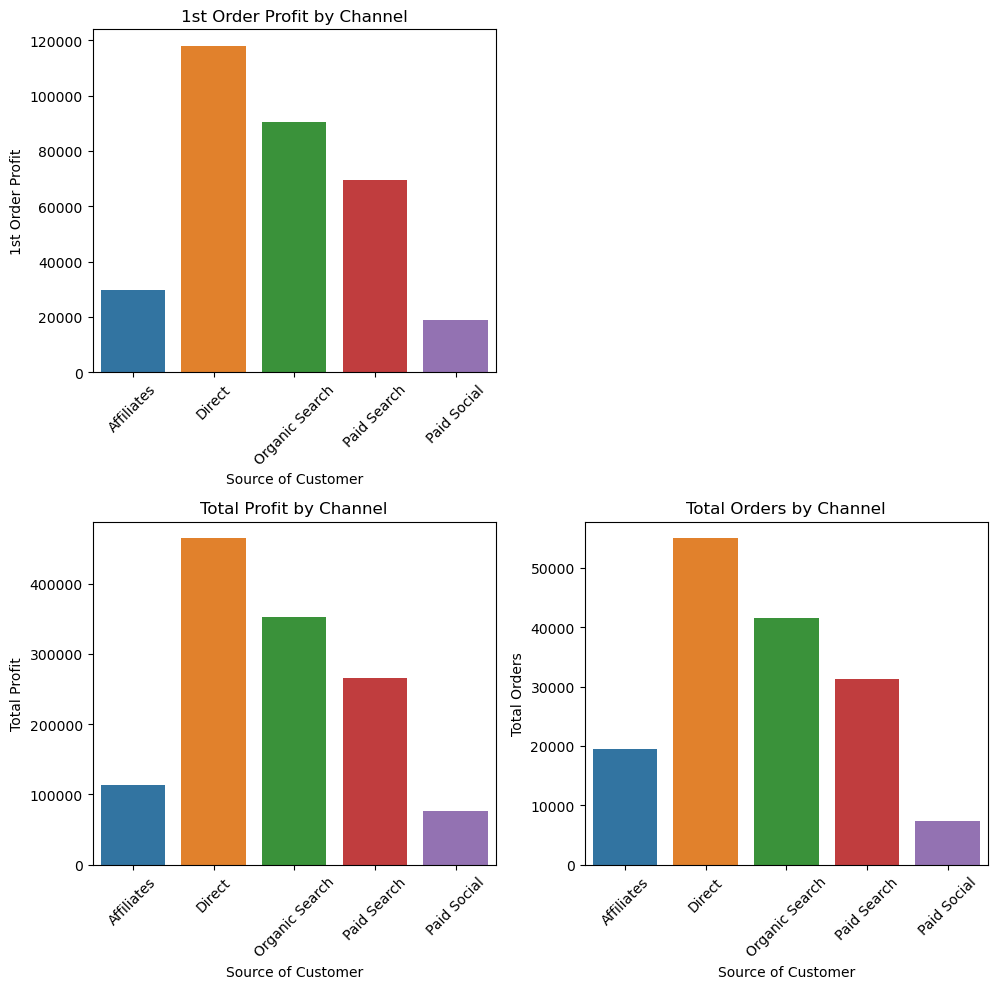

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Defining a function to plot the data with Seaborn
def plot_channel_performance(data, row, col, metric, title):
    plt.subplot(2, 3, 3*row + col)
    sns.barplot(x='Source of Customer', y=metric, data=data)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()

# Setting the size of the overall plot
plt.figure(figsize=(15, 10))

# Plotting the data using the function
plot_channel_performance(channel_performance, 0, 1, '1st Order Profit', '1st Order Profit by Channel')
plot_channel_performance(channel_performance, 1, 1, 'Total Profit', 'Total Profit by Channel')
plot_channel_performance(channel_performance, 1, 2, 'Total Orders', 'Total Orders by Channel')

plt.show()

### Insights from the above:    

1st Order Profit by Channel: Direct channel is the leading contributer to the 1st order profit, following that, it is the Organic search channel. Paid social channel and Affiliates contributes the least to the 1st order profit. The differences in the top performing channels and the least performming channels are significant, so there's a disparity in their performance.

Total Profit by Channel: Direct Channel is the leading contrubuter here as well in the Total Profit, following that, it is again Organic Search Channel. Paid social channel and Affiliates contributes the least to the least total profit. Similar as the 1st Order profit.

Total Orders Channel: Similar results as the previous two. Direct leading, following by Organic. Least are Affiliates and Paid social.

#### Overall Insights: 

DIRECT CHANNEL: The direct channel is the most profitable and effective method of acquiring customers which could mean the company has loyal customers, a good brand and good marketing.

ORGANIC SEARCH: Performs well which could mean they've a good online presence. 

PAID SOCIAL: Starts slow in 1st order profit but for the total profit and orders, it picks up, which could mean it's attracting loyal cutomers.

PAID SEARCH: The total profit for paid search is proportional to the total orders, which is in standards to the Direct and Oragic search. For this channel we are given the cost spent which we will analysis further below.

AFFILIATES: Here, the 1st order profit is good but then it drops for the total profit which could mean that this channel isn't performing that well. Furthermore, it lags in all the cases. we are given the cost spent for this which we will analysis further below.

In [37]:
#Extract month and year from the Registration Date
merged_data['Year-Month'] = merged_data['Registration Date'].dt.to_period('M')

#Group by Month-Year and Source of Customer to get total profit
profit_grouped = merged_data.groupby(['Year-Month', 'Source of Customer'])['Total Profit'].sum().reset_index()

In [38]:
profit_grouped.head(15)

,Year-Month,Source of Customer,Total Profit
0,2013-01,Affiliates,22453.972945
1,2013-01,Direct,103143.115014
2,2013-01,Organic Search,65873.159511
3,2013-01,Paid Search,57731.826567
4,2013-01,Paid Social,11567.870745
5,2013-02,Affiliates,21577.587797
6,2013-02,Direct,145111.991610
7,2013-02,Organic Search,84322.517079
8,2013-02,Paid Search,110862.496557
9,2013-02,Paid Social,12947.685600


The above is the total profit for month by month basis (Jan to March: According to our dataset) to the respective channel type (source of customer).

In [39]:
#Adding the cost data here and coverting it to a dataframe
data = {
    'Month': ['Jan-13', 'Feb-13', 'Mar-13'],
    'Paid Search': [41512.00, 61243.00, 84597.88],
    'Affiliates': [16421.00, 42101.00, 141321.00]
}
cost_data = pd.DataFrame(data)
cost_data

,Month,Paid Search,Affiliates
0,Jan-13,41512.00,16421.0
1,Feb-13,61243.00,42101.0
2,Mar-13,84597.88,141321.0


In [40]:
#Converting the Month column in cost_data to a Year-Month format similar to profit_grouped
cost_data['Year-Month'] = pd.to_datetime(cost_data['Month'], format='%b-%y').dt.to_period('M')

#Merging the two dataframes on Year-Month
merged_profit_cost = pd.merge(profit_grouped, cost_data, on='Year-Month', how='left')

In [41]:
#Calculating ROI for Paid Search and Affiliates
merged_profit_cost['Paid Search ROI'] = np.where(
    merged_profit_cost['Source of Customer'] == 'Paid Search',
    ((merged_profit_cost['Total Profit'] - merged_profit_cost['Paid Search']) / merged_profit_cost['Paid Search']) * 100,
    np.nan
)

merged_profit_cost['Affiliates ROI'] = np.where(
    merged_profit_cost['Source of Customer'] == 'Affiliates',
    ((merged_profit_cost['Total Profit'] - merged_profit_cost['Affiliates']) / merged_profit_cost['Affiliates']) * 100,
    np.nan
)

#Filtering Columns (adding only necessary ones)
final_output = merged_profit_cost[['Year-Month', 'Source of Customer', 'Total Profit', 'Paid Search ROI', 'Affiliates ROI']]

In [42]:
#Filtering the rows
final_output = final_output[
    (final_output['Paid Search ROI'].notna()) | (final_output['Affiliates ROI'].notna())
]

In [43]:
final_output

,Year-Month,Source of Customer,Total Profit,Paid Search ROI,Affiliates ROI
0,2013-01,Affiliates,22453.972945,NaN,36.739376
3,2013-01,Paid Search,57731.826567,39.072621,NaN
5,2013-02,Affiliates,21577.587797,NaN,-48.748040
8,2013-02,Paid Search,110862.496557,81.020682,NaN
10,2013-03,Affiliates,69515.031034,NaN,-50.810544
13,2013-03,Paid Search,97562.591664,15.325102,NaN


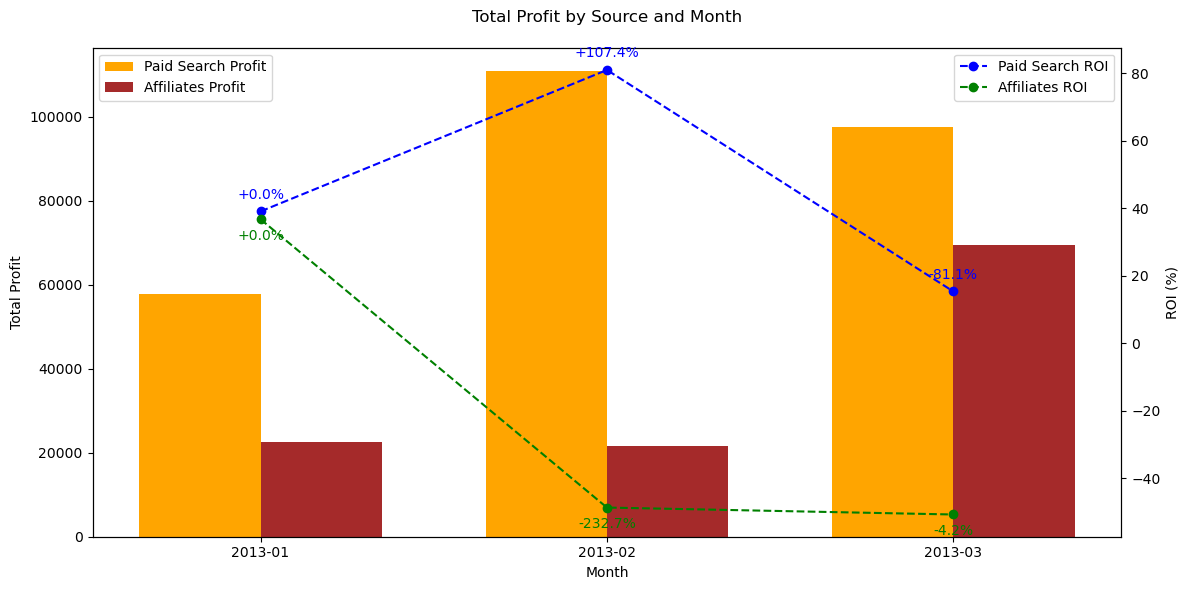

In [44]:
#Function to compute percentage change
def compute_percentage_change(data):
    return [0] + [(data[i] - data[i-1]) / abs(data[i-1]) * 100 if data[i-1] != 0 else 0 for i in range(1, len(data))]

#Computing percentage changes
roi_paid_search = final_output[final_output['Source of Customer'] == 'Paid Search']['Paid Search ROI'].values
roi_affiliates = final_output[final_output['Source of Customer'] == 'Affiliates']['Affiliates ROI'].values
roi_paid_search_change = compute_percentage_change(roi_paid_search)
roi_affiliates_change = compute_percentage_change(roi_affiliates)

#Setting up the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

#Bar plot for profits
width = 0.35
ind = np.arange(len(final_output['Year-Month'].unique()))  # Integer indices for months
profits_paid_search = final_output[final_output['Source of Customer'] == 'Paid Search']['Total Profit'].values
profits_affiliates = final_output[final_output['Source of Customer'] == 'Affiliates']['Total Profit'].values

ax1.bar(ind - width/2, profits_paid_search, width, label='Paid Search Profit', color='orange')
ax1.bar(ind + width/2, profits_affiliates, width, label='Affiliates Profit', color='brown')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Profit')
ax1.set_title('Total Profit by Source and Month\n')
ax1.set_xticks(ind)
ax1.set_xticklabels(final_output['Year-Month'].unique())
ax1.legend(loc='upper left')

#Line plot for ROI
ax2 = ax1.twinx()
roi_paid_search = final_output[final_output['Source of Customer'] == 'Paid Search']['Paid Search ROI'].values
roi_affiliates = final_output[final_output['Source of Customer'] == 'Affiliates']['Affiliates ROI'].values

ax2.plot(ind, roi_paid_search, label='Paid Search ROI', marker='o', color='blue', linestyle='dashed')
ax2.plot(ind, roi_affiliates, label='Affiliates ROI', marker='o', color='green', linestyle='dashed')
ax2.set_ylabel('ROI (%)')
ax2.legend(loc='upper right')

#Adding percentage changes for the ROI
for i, (roi, roi_change) in enumerate(zip(roi_paid_search, roi_paid_search_change)):
    ax2.annotate(f'{roi_change:+.1f}%', (ind[i], roi), xytext=(0, 7), textcoords='offset points', ha='center', va='bottom', color='blue')
    
for i, (roi, roi_change) in enumerate(zip(roi_affiliates, roi_affiliates_change)):
    ax2.annotate(f'{roi_change:+.1f}%', (ind[i], roi), xytext=(0, -7), textcoords='offset points', ha='center', va='top', color='green')

plt.tight_layout()
plt.show()

### Insights from the above:

Performances of sources: Paid search channel consistently outperforms the Affiliates channel in terms of total profit for the 3 months. 

Return of investment (ROI): In January, the ROI is positive which indicates that the profit in these channels were good. But, in Febuary and March, the ROI of Affiliates had negative values indicating Affiliates channel being inefficient in Feb and March. But on the other hand, Paid search had an increased ROI in Feb and a small dip in March but overall ROI is still positive.

Monthly Trends: Profits in Affiliates saw a dip in Feb but rose sharply in March. Paid Search saw a sharp rise in Feb but dipped in March but the ROI is still higher in March.

### To keep track of the features built, creating a new dataframe frame called Merged_data (with all the data):

In [45]:
Merged_data = pd.merge(value_data, demographic_data, on='Customer ID', how='inner')
Merged_data

,Customer ID,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions,Total Profit,Total Orders,Title,Date Of Birth,Address City,Contact Allowed,Registration Date,Source of Customer
0,1,8.97261,5.307720,1,6.600000,7.680330,2,Mr,1973-06-29,Malahide,Y,2013-01-01 00:23:00,Organic Search
1,2,7.92288,70.156800,7,6.639453,71.440227,8,Mr,1984-07-25,Dublin,Y,2013-01-01 00:30:00,Affiliates
2,3,14.06160,50.803200,7,0.000000,64.864800,8,Mr,1991-05-01,Dublin,Y,2013-01-01 01:09:00,Paid Social
3,4,14.07672,0.000000,0,0.000000,14.076720,1,Mr,1986-11-30,Dublin,N,2013-01-01 01:19:00,Affiliates
4,5,22.68000,68.221440,9,14.771948,76.129492,10,Mr,1991-10-02,Limerick,Y,2013-01-01 01:58:00,Paid Search
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30586,31437,11.08800,97.396992,9,27.623670,80.861322,10,Mr,1964-12-19,Dublin,N,2013-03-15 17:28:00,Affiliates
30587,31438,20.73600,69.672960,10,8.870218,81.538742,11,Mr,1977-09-23,Mullingar,Y,2013-03-15 17:28:00,Paid Search
30588,31439,6.89472,41.803776,4,0.000000,48.698496,5,Mr,1988-07-02,Dublin,Y,2013-03-15 17:28:00,Paid Social
30589,31440,8.98800,0.000000,0,2.519968,6.468032,1,Miss,1993-02-10,Dublin,Y,2013-03-15 17:29:00,Direct


### Creating some more features for analysis:

#### Age

In [46]:
#Getting the age of the customer with present year as 2013
present_year = 2013
Merged_data['Age'] = present_year - Merged_data['Date Of Birth'].dt.year - ((Merged_data['Date Of Birth'].dt.month > pd.Timestamp.now().month) | ((Merged_data['Date Of Birth'].dt.month == pd.Timestamp.now().month) & (Merged_data['Date Of Birth'].dt.day > pd.Timestamp.now().day)))

#### Age Group Number

In [47]:
#Defining age bins and labels for age groups
bins = [0, 18, 30, 40, 50, float('inf')]
labels = ["0-18", "19-30", "31-40", "41-50", "51+"]

#Creating 'Age Group' column - in string
Merged_data['Age Group'] = pd.cut(Merged_data['Age'], bins=bins, labels=labels, right=False)

#Converting 'Age Group' to numerical values for clustering, 0-18 is 1, 19-30 is 2, 31-40 is 3, 41-50 is 4 and 51+ 5
age_group_mapping = {
    "0-18": 1,
    "19-30": 2,
    "31-40": 3,
    "41-50": 4,
    "51+": 5
}
Merged_data['Age Group Number'] = Merged_data['Age Group'].replace(age_group_mapping)

In [48]:
Merged_data

,Customer ID,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions,Total Profit,Total Orders,Title,Date Of Birth,Address City,Contact Allowed,Registration Date,Source of Customer,Age,Age Group,Age Group Number
0,1,8.97261,5.307720,1,6.600000,7.680330,2,Mr,1973-06-29,Malahide,Y,2013-01-01 00:23:00,Organic Search,40,41-50,4
1,2,7.92288,70.156800,7,6.639453,71.440227,8,Mr,1984-07-25,Dublin,Y,2013-01-01 00:30:00,Affiliates,29,19-30,2
2,3,14.06160,50.803200,7,0.000000,64.864800,8,Mr,1991-05-01,Dublin,Y,2013-01-01 01:09:00,Paid Social,22,19-30,2
3,4,14.07672,0.000000,0,0.000000,14.076720,1,Mr,1986-11-30,Dublin,N,2013-01-01 01:19:00,Affiliates,27,19-30,2
4,5,22.68000,68.221440,9,14.771948,76.129492,10,Mr,1991-10-02,Limerick,Y,2013-01-01 01:58:00,Paid Search,22,19-30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30586,31437,11.08800,97.396992,9,27.623670,80.861322,10,Mr,1964-12-19,Dublin,N,2013-03-15 17:28:00,Affiliates,49,41-50,4
30587,31438,20.73600,69.672960,10,8.870218,81.538742,11,Mr,1977-09-23,Mullingar,Y,2013-03-15 17:28:00,Paid Search,36,31-40,3
30588,31439,6.89472,41.803776,4,0.000000,48.698496,5,Mr,1988-07-02,Dublin,Y,2013-03-15 17:28:00,Paid Social,25,19-30,2
30589,31440,8.98800,0.000000,0,2.519968,6.468032,1,Miss,1993-02-10,Dublin,Y,2013-03-15 17:29:00,Direct,20,19-30,2


#### Gender

In [49]:
Merged_data['Gender'] = Merged_data['Title'].map({
    "Mr": "Male",
    "Mrs": "Female",
    "Miss": "Female",
    "Unknown": "Unknown"
})

#### Average Profit Per Order

In [50]:
#Average Profit Per Order - can tell us how valuable each order is from a customer
Merged_data['Average Profit per Order'] = (Merged_data['Total Profit']) / (Merged_data['Subsequent Orders Count'] + 1)

#### Promotion Use Rate

In [51]:
Merged_data['Promotion Use Rate'] = Merged_data['Total value of all promotions'] / (Merged_data['Subsequent Orders Count'] + 1)

### K-means Clustering for Customer Segmentation:

In [52]:
Merged_data.isnull().sum()

Customer ID                      0
1st Order Profit                 0
Subsequent Order Profit          0
Subsequent Orders Count          0
Total value of all promotions    0
Total Profit                     0
Total Orders                     0
Title                            0
Date Of Birth                    0
Address City                     0
Contact Allowed                  0
Registration Date                0
Source of Customer               0
Age                              0
Age Group                        0
Age Group Number                 0
Gender                           0
Average Profit per Order         0
Promotion Use Rate               0
dtype: int64

In [53]:
Merged_data.head(10)

,Customer ID,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions,Total Profit,Total Orders,Title,Date Of Birth,Address City,Contact Allowed,Registration Date,Source of Customer,Age,Age Group,Age Group Number,Gender,Average Profit per Order,Promotion Use Rate
0,1,8.97261,5.307720,1,6.600000,7.680330,2,Mr,1973-06-29,Malahide,Y,2013-01-01 00:23:00,Organic Search,40,41-50,4,Male,3.840165,3.300000
1,2,7.92288,70.156800,7,6.639453,71.440227,8,Mr,1984-07-25,Dublin,Y,2013-01-01 00:30:00,Affiliates,29,19-30,2,Male,8.930028,0.829932
2,3,14.06160,50.803200,7,0.000000,64.864800,8,Mr,1991-05-01,Dublin,Y,2013-01-01 01:09:00,Paid Social,22,19-30,2,Male,8.108100,0.000000
3,4,14.07672,0.000000,0,0.000000,14.076720,1,Mr,1986-11-30,Dublin,N,2013-01-01 01:19:00,Affiliates,27,19-30,2,Male,14.076720,0.000000
4,5,22.68000,68.221440,9,14.771948,76.129492,10,Mr,1991-10-02,Limerick,Y,2013-01-01 01:58:00,Paid Search,22,19-30,2,Male,7.612949,1.477195
5,6,3.78000,34.110720,3,1.598552,36.292168,4,Mr,1986-05-03,Dublin,N,2013-01-01 02:11:00,Direct,27,19-30,2,Male,9.073042,0.399638
6,7,10.20600,0.000000,0,0.552120,9.653880,1,Mr,1972-05-16,Dublin,N,2013-01-01 02:29:00,Organic Search,41,41-50,4,Male,9.653880,0.552120
7,8,23.67792,48.771072,8,0.000000,72.448992,9,Mr,1976-04-06,Dublin,N,2013-01-01 02:54:00,Paid Social,37,31-40,3,Male,8.049888,0.000000
8,9,13.56300,70.752000,5,0.000000,84.315000,6,Mrs,1965-03-12,Dublin,Y,2013-01-01 05:04:00,Paid Search,48,41-50,4,Female,14.052500,0.000000
9,10,11.97000,9.324000,1,4.188882,17.105118,2,Miss,1989-01-07,Dungarvan,Y,2013-01-01 09:43:00,Paid Search,24,19-30,2,Female,8.552559,2.094441


#### Using Pearson's correlation coefficient (performing multicollinearity test):

Here, in our Merged_data table, we remove columns which are directly proportional to each other, as they provide us the same meaning, we can remove Subsequent Order Profit (similar to Total Profit), Subsequent Orders Count (similar to Total Count), Total Value of all promotions (similar to Promotion Use Rate) and Customer ID (As the number signify's the ID).

In [54]:
Features1 = [
    '1st Order Profit',
    'Total Profit',
    'Total Orders',
    'Average Profit per Order',  
    'Promotion Use Rate'
]

In [55]:
numeric_data = Merged_data[Features1]
correlation_matrix = numeric_data.corr()
correlation_matrix

,1st Order Profit,Total Profit,Total Orders,Average Profit per Order,Promotion Use Rate
1st Order Profit,1.000000,0.215077,0.022883,0.651657,0.222365
Total Profit,0.215077,1.000000,0.815934,0.332149,-0.116315
Total Orders,0.022883,0.815934,1.000000,-0.058473,-0.080188
Average Profit per Order,0.651657,0.332149,-0.058473,1.000000,-0.020137
Promotion Use Rate,0.222365,-0.116315,-0.080188,-0.020137,1.000000


From above we can notice that no correlation is 0.9 to 1, so we can conclude that these variables aren't correlated and we can use these variables for clustering. 

In [56]:
features = [
    '1st Order Profit',
    'Total Profit',
    'Total Orders',
    'Average Profit per Order',  
    'Promotion Use Rate'
]

#### Removing outliers for the features

In [57]:
outliers = []
Features1 = [
    '1st Order Profit',
    'Total Profit',
    'Total Orders',
    'Average Profit per Order',  
    'Promotion Use Rate'
]

#Identifying Outliers
for feature in Features1:
    Q1 = Merged_data[feature].quantile(0.25)
    Q3 = Merged_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers += Merged_data[(Merged_data[feature] < (Q1 - 1.5 * IQR)) | (Merged_data[feature] > (Q3 + 1.5 * IQR))].index.tolist()

#Getting unique indices of outlier rows
unique_outliers = list(set(outliers))

#Count Outliers and Calculate Percentage
percentage_outliers = len(unique_outliers) / len(Merged_data) * 100

print(f"Number of outliers identified: {len(unique_outliers)}")
print(f"Percentage of data that are outliers: {percentage_outliers:.2f}%")

#Removing Outliers
Merged_data_cleaned = Merged_data.drop(index=unique_outliers)

print(f"Original dataframe shape: {Merged_data.shape}")
print(f"Dataframe shape after outlier removal: {Merged_data_cleaned.shape}")

Number of outliers identified: 3764
Percentage of data that are outliers: 12.30%
Original dataframe shape: (30591, 19)
Dataframe shape after outlier removal: (26827, 19)


In [58]:
#converting Merge_data into Merged_data_cleaned
Merged_data = Merged_data_cleaned

In [59]:
Merged_data.shape

(26827, 19)

In [60]:
#Normalizing variables for clustering
X = Merged_data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

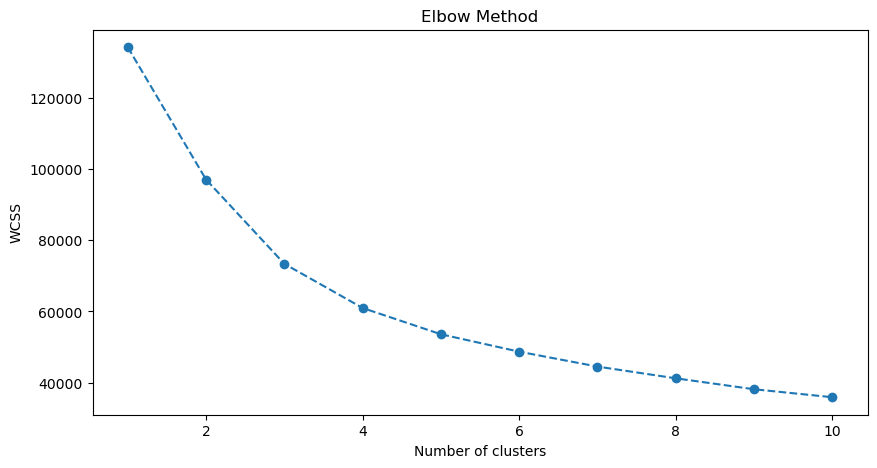

In [61]:
#Using Elbow Method to determine the number of clusters for kmeans clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above k=4, as that's the point where the rate of decrease in WCSS starts to level off.

In [62]:
#Clustering the data
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
Merged_data['Cluster'] = kmeans.fit_predict(X_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [63]:
Merged_data.head(20)

,Customer ID,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions,Total Profit,Total Orders,Title,Date Of Birth,Address City,Contact Allowed,Registration Date,Source of Customer,Age,Age Group,Age Group Number,Gender,Average Profit per Order,Promotion Use Rate,Cluster
0,1,8.97261,5.307720,1,6.600000,7.680330,2,Mr,1973-06-29,Malahide,Y,2013-01-01 00:23:00,Organic Search,40,41-50,4,Male,3.840165,3.300000,3
1,2,7.92288,70.156800,7,6.639453,71.440227,8,Mr,1984-07-25,Dublin,Y,2013-01-01 00:30:00,Affiliates,29,19-30,2,Male,8.930028,0.829932,1
2,3,14.06160,50.803200,7,0.000000,64.864800,8,Mr,1991-05-01,Dublin,Y,2013-01-01 01:09:00,Paid Social,22,19-30,2,Male,8.108100,0.000000,1
3,4,14.07672,0.000000,0,0.000000,14.076720,1,Mr,1986-11-30,Dublin,N,2013-01-01 01:19:00,Affiliates,27,19-30,2,Male,14.076720,0.000000,0
4,5,22.68000,68.221440,9,14.771948,76.129492,10,Mr,1991-10-02,Limerick,Y,2013-01-01 01:58:00,Paid Search,22,19-30,2,Male,7.612949,1.477195,1
5,6,3.78000,34.110720,3,1.598552,36.292168,4,Mr,1986-05-03,Dublin,N,2013-01-01 02:11:00,Direct,27,19-30,2,Male,9.073042,0.399638,2
6,7,10.20600,0.000000,0,0.552120,9.653880,1,Mr,1972-05-16,Dublin,N,2013-01-01 02:29:00,Organic Search,41,41-50,4,Male,9.653880,0.552120,0
7,8,23.67792,48.771072,8,0.000000,72.448992,9,Mr,1976-04-06,Dublin,N,2013-01-01 02:54:00,Paid Social,37,31-40,3,Male,8.049888,0.000000,1
8,9,13.56300,70.752000,5,0.000000,84.315000,6,Mrs,1965-03-12,Dublin,Y,2013-01-01 05:04:00,Paid Search,48,41-50,4,Female,14.052500,0.000000,1
9,10,11.97000,9.324000,1,4.188882,17.105118,2,Miss,1989-01-07,Dungarvan,Y,2013-01-01 09:43:00,Paid Search,24,19-30,2,Female,8.552559,2.094441,3


### Cluster Characteristics

In [64]:
Merged_data.groupby('Cluster')[features].mean()

,1st Order Profit,Total Profit,Total Orders,Average Profit per Order,Promotion Use Rate
Cluster,,,,,
0,15.430389,27.574351,2.279035,12.897356,0.675927
1,10.462476,75.778326,9.592205,8.312833,0.873322
2,5.091562,13.859546,2.812785,4.879817,0.620387
3,11.367321,23.943751,3.814534,7.064251,3.308967


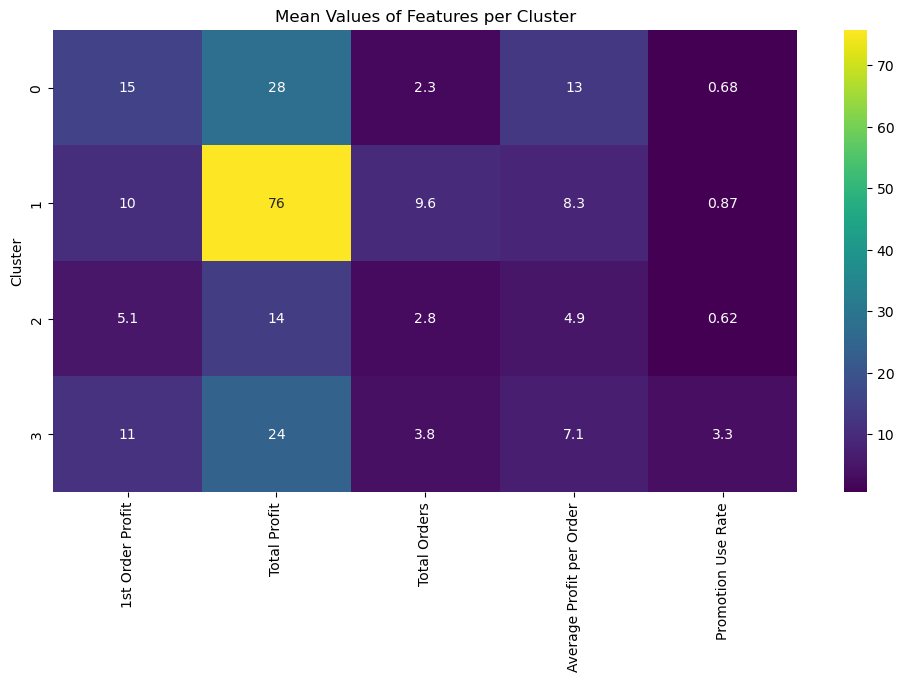

In [70]:
data = {
    'Cluster': [0, 1, 2, 3],
    '1st Order Profit': [15.430389, 10.462476, 5.091562, 11.367321],
    'Total Profit': [27.574351, 75.778326, 13.859546, 23.943751],
    'Total Orders': [2.279035, 9.592205, 2.812785, 3.814534],
    'Average Profit per Order': [12.897356, 8.312833, 4.879817, 7.064251],
    'Promotion Use Rate': [0.675927, 0.873322, 0.620387, 3.308967]
}

df = pd.DataFrame(data)
df = df.set_index('Cluster')

#Heatmap for the features overview
plt.figure(figsize=(12, 6))
sns.heatmap(df, annot=True, cmap='viridis')
plt.title('Mean Values of Features per Cluster')
plt.show()

### Insights from the above: 

Cluster 0 ->
1st Order Profit: Customers in this cluster tend to have a higher profit on their first order (€15.43).
Total Profit: Their average total profit is €27.57.
Total Orders: On average, these customers place slightly over 2 orders.
Average Profit per Order: The average profit per order is €12.89, suggesting that while they might not order very frequently, when they do, it's of a relatively high value.
Promotion Use Rate: These customers use promotions at a rate of 0.6759 promotions per order, which is relatively low compared to other clusters

Cluster 1 -> 1st Order Profit: Customers have a 1st order profit of €10.46, which is lower than Cluster 0 but higher than Clusters 2 and 3.
Total Profit: They have the highest total profit of €75.77.
Total Orders: They place the most orders on average (9.6 orders), suggesting this cluster represents frequent shoppers.
Average Profit per Order: Despite their frequency, each order's value is lower (€8.31) compared to Cluster 0.
Promotion Use Rate: They use promotions at a rate of 0.8733, which is moderate.

Cluster 2 -> 1st Order Profit: These customers have the lowest first order profit (€5.09).
Total Profit: They have an average total profit of €13.86.
Total Orders: They order roughly 2.8 times.
Average Profit per Order: They have the lowest average profit per order (€4.88).
Promotion Use Rate: The promotion use rate is 0.6204, which is the second-lowest among all clusters.

Cluster 3 -> 1st Order Profit: Customers in this cluster have a first order profit of €11.36.
Total Profit: Their average total profit is €23.94.
Total Orders: They order approximately 3.8 times.
Average Profit per Order: Their average profit per order is €7.06.
Promotion Use Rate: This cluster uses promotions the most, at a rate of 3.3089, suggesting these customers are heavily influenced by promotions.

#### Overall Insights:

#### Cluster 0 are premium customers. They are off high-value. They might not order frequently, but when they do, they contribute a significant profit.

#### Cluster 1 are frequent customers. They have the most number of orders and a high total profit, but their average order value is lower.

#### Cluster 2 are casual customers since they have the lowest first order profit and average profit per order.

#### Cluster 3 are promotion-driven customers. They have a moderate profit but heavily use promotions.

### Distribution Visualization

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


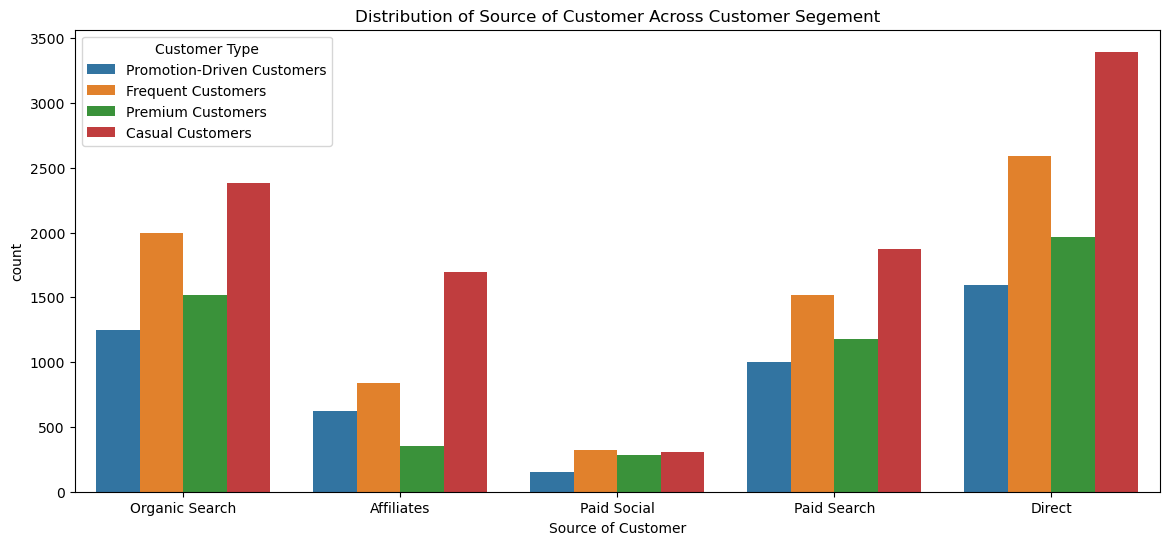

Cluster_Label Source of Customer     0     1     2     3
0                     Affiliates   355   838  1695   621
1                         Direct  1969  2590  3395  1594
2                 Organic Search  1520  1995  2383  1244
3                    Paid Search  1175  1516  1875  1002
4                    Paid Social   285   322   304   149


In [71]:
cluster_names = {
    0: 'Premium Customers',
    1: 'Frequent Customers',
    2: 'Casual Customers',
    3: 'Promotion-Driven Customers'
}

#Adding Cluster Labels to Merged_data DataFrame - got cluster label when doing Kmeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
Merged_data['Cluster_Label'] = kmeans.fit_predict(X_scaled)

Merged_data['Cluster_Name'] = Merged_data['Cluster_Label'].map(cluster_names)

plt.figure(figsize=(14,6))
sns.countplot(x='Source of Customer', hue='Cluster_Name', data=Merged_data)
plt.title('Distribution of Source of Customer Across Customer Segement')
plt.legend(title='Customer Type')
plt.show()

#Extracting count values for each cluster across different channels
cluster_counts = Merged_data.groupby(['Source of Customer', 'Cluster_Label']).size().unstack().reset_index()
print(cluster_counts)

### Insights from the above:

Organic Search -> This channel is effective in attracting casual customers (2,383) and frequent shoppers (1,995) but brings fewer premium (1,520) and promotion-driven customers (1,244).

Affiliates -> This chan is effective in attracting casual customers (Cluster 2) with 1,695 customers.
They also bring a significant number of frequent shoppers (838) and premium customers (355), but they are least effective in attracting promotion-driven customers (621).

Paid social -> This channel is least the effective in all clusters. The channel mostly attracts frequent shoppers (322) and casual customers (304), but it brings in the least premium (285) and promotion-driven customers (149).

Paid Search -> Similar pattern to Organic search. This channel sees a balanced distribution with a focus on casual customers (1,875) followed by frequent shoppers (1,516), premium customers (1,175), and promotion-driven customers (1,002).

Direct -> This channel dominates in all clusters, bringing the most premium customers (1,969), frequent shoppers (2,590), casual customers (3,395), and promotion-driven customers (1,594).

### Channel & Cluster Intersection

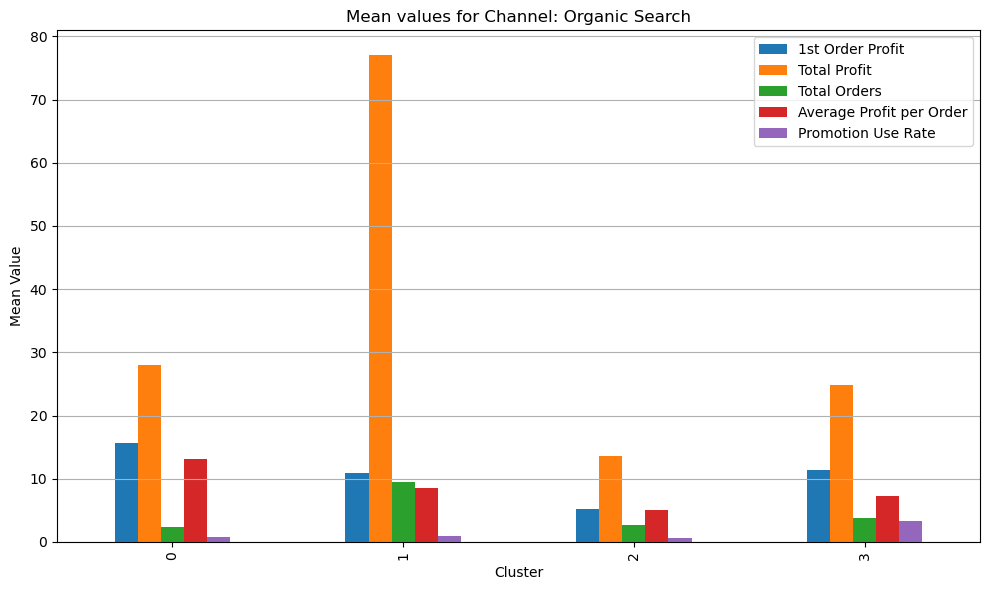

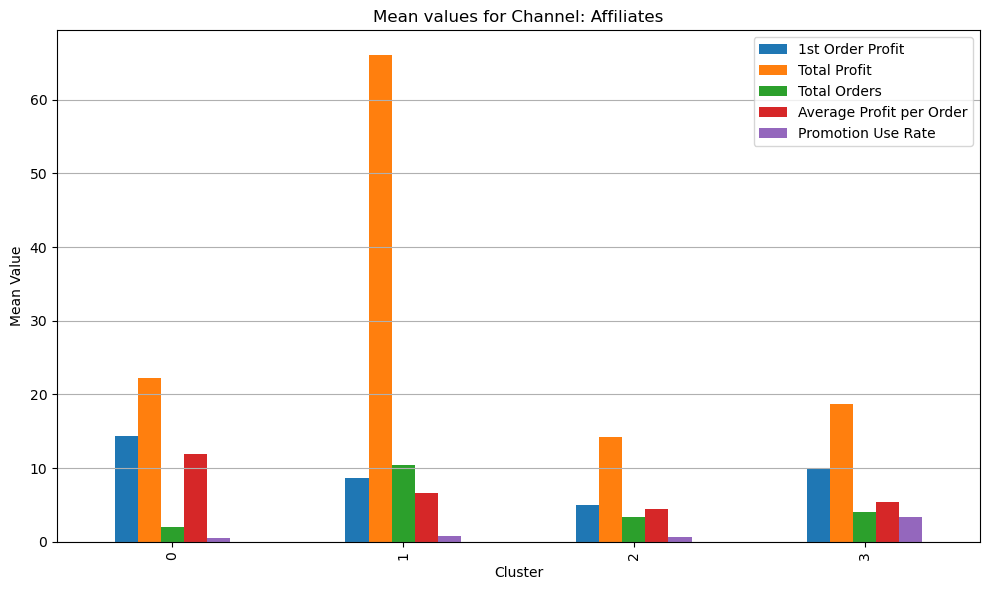

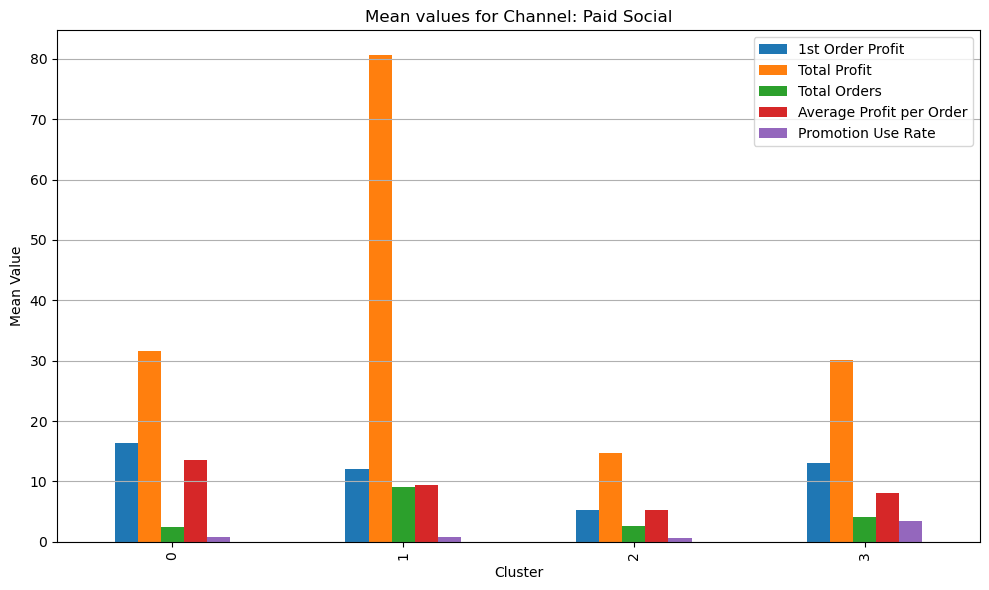

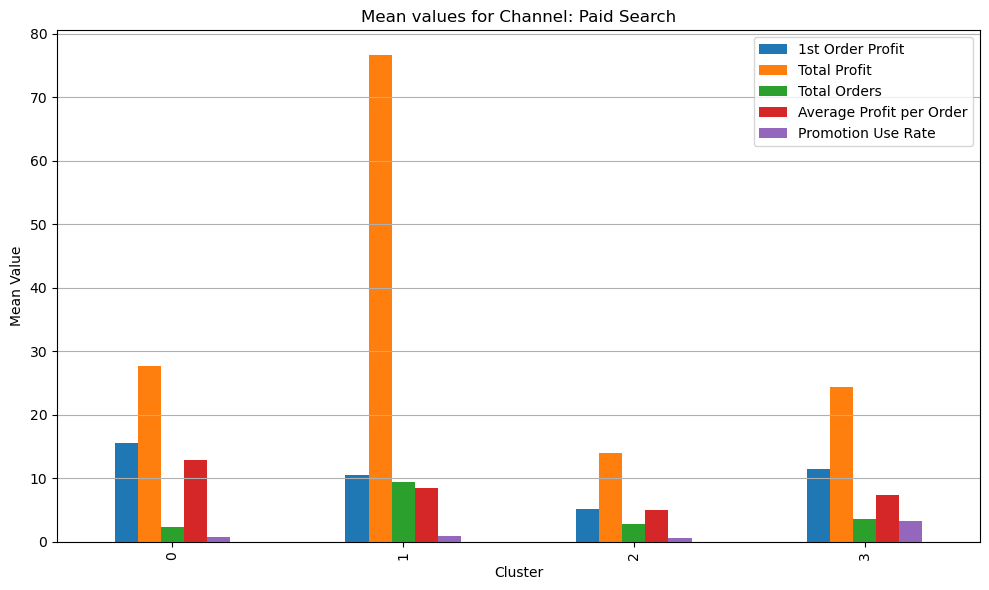

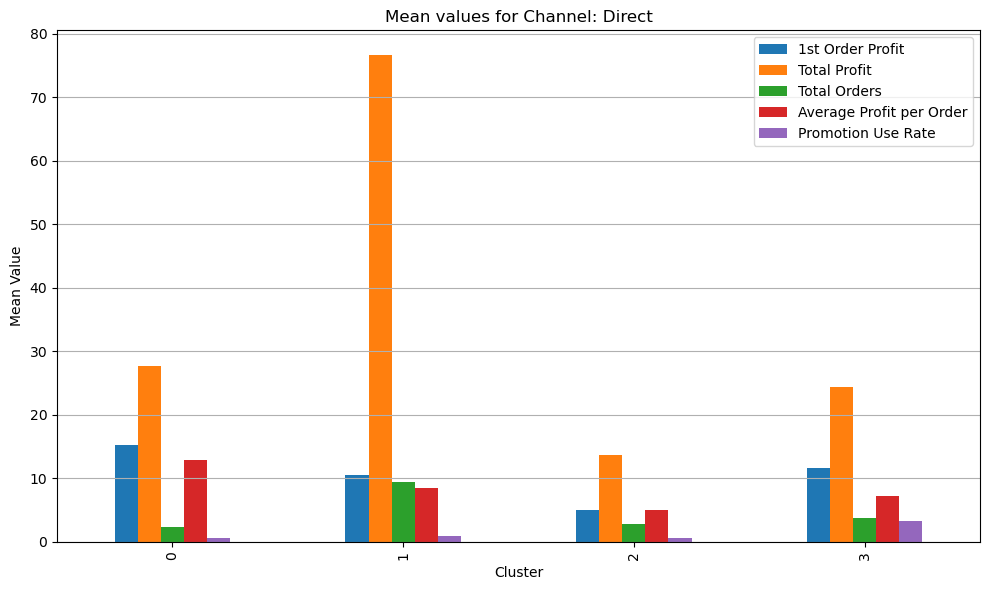

In [72]:
channels = Merged_data['Source of Customer'].unique()

for channel in channels:
    subset = Merged_data[Merged_data['Source of Customer'] == channel]
    means = subset.groupby('Cluster')[features].mean()
    
    means.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Mean values for Channel: {channel}')
    plt.ylabel('Mean Value')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

In [73]:
for channel in channels:
    print(f"\nChannel: {channel}")
    subset = Merged_data[Merged_data['Source of Customer'] == channel]
    print(subset.groupby('Cluster')[features].mean())


Channel: Organic Search
         1st Order Profit  Total Profit  Total Orders  \
Cluster                                                 
0               15.689388     27.950823      2.296053   
1               10.860775     77.114400      9.542857   
2                5.158316     13.602251      2.645825   
3               11.405919     24.902095      3.841640   

         Average Profit per Order  Promotion Use Rate  
Cluster                                                
0                       13.059164            0.717979  
1                        8.508867            0.902323  
2                        5.000711            0.595106  
3                        7.207810            3.289881  

Channel: Affiliates
         1st Order Profit  Total Profit  Total Orders  \
Cluster                                                 
0               14.365741     22.286280      2.025352   
1                8.624496     66.120307     10.452267   
2                4.950188     14.242294      3.

### Insights from the above:

Organic Search - > 
Premium Customers (Cluster 0): These customers have a healthy 1st Order Profit (15.69) and Total Profit (27.95). They also maintain a good Average Profit per Order at 13.05. They seem to utilize promotions moderately (71.8% rate).
Frequent Customers (Cluster 1): This group orders frequently (9.54 times on average) and contributes a significant Total Profit (77.11). However, their Average Profit per Order (8.51) is lower than the premium segment.
Casual Customers (Cluster 2): They possess the lowest metrics in almost all areas among Organic Search. They have the lowest average profit per order of 5.
Promotion-Driven Customers (Cluster 3): These customers make use of promotions heavily (328.9%), indicating that they might be looking for deals and offers.

Affiliates -> Premium Customers: These customers bring in a lower 1st Order Profit (14.37) than those from Organic Search.
Frequent Customers: They order more frequently (10.45 times) than their counterparts in Organic Search, but their Average Profit per Order (6.64) is the lowest among all channels for this segment.
Casual Customers: They have a higher number of total orders (3.31) than Organic Search but bring in slightly higher profit metrics.
Promotion-Driven Customers: Use promotions (332%) heavily, even more than the Organic Search cluster.

Paid Social ->
Premium Customers: Bring in the highest 1st Order Profit (16.37) and Total Profit (31.67) among all channels.
Frequent Customers: They have the highest total profit (80.68) among all channels for this segment.
Casual Customers: This group in Paid Social has a better 1st Order Profit (5.35) and average profit per order (5.35) compared to other channels.
Promotion-Driven Customers: Use promotions intensely (341%).

Paid Search -> Premium Customers: They bring a decent 1st Order Profit (15.49) and Total Profit (27.63).
Frequent Customers: Metrics are closely aligned with those from Organic Search.
Casual Customers: Their metrics are in the middle of the range across all channels.
Promotion-Driven Customers: This segment seems to take advantage of promotions moderately (331.2%).

Direct ->
Premium Customers: These customers have slightly lower metrics than Paid Social but still bring a good amount of profit.
Frequent Customers: They have a good balance between the number of orders and total profit.
Casual Customers: This group's metrics are relatively lower compared to other channels.
Promotion-Driven Customers: They utilize promotions at a rate of 330.8%.

# III. (b) Recommendations for Channel Performance:

1. Organic Search: For this channel, since it attracts casual and frequent customers, recommend investing in improving the company's website to increase its visibility in Google, Microsoft Bing, and other search engines.

2. Affiliates: For this channel, since affiliates attract a significant number of casual customers, encourage focusing on partnering with affiliates who have a strong presence among men's fashion industry.

3. Paid Social: This channel isn't the strongest channel but if targetted correctly to premium customers then it could be beneficial. Collaborate with fashion influencers to push the brand on Instagram.

4. Paid Search: Focus on ad placements that attract casual and frequent customers, as these segments seem to be most responsive. Since the promotion-driven segment is moderately responsive, ensure to highlight ongoing promotions in ad.

5. Direct: Since the direct channel is where we get most of our customers, we can introduce loyalty programs to make sure there are repeat customers, specially targetting Premium and Frequent customers giving them additional benefits.

# IV. (a) Analysis on Demographic Differences

### a. Distribution of Age Group across the customer segments

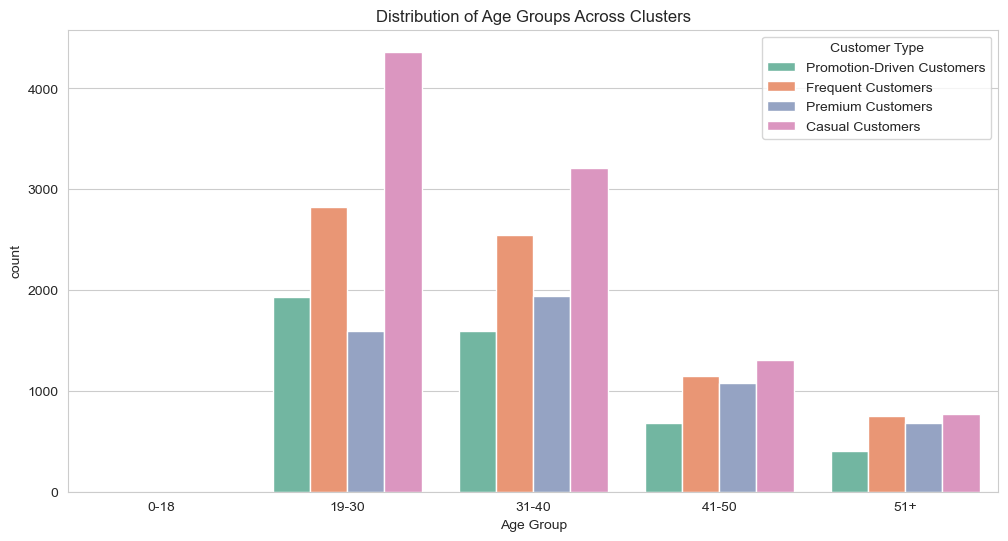

Cluster_Label     0     1     2     3
Age Group                            
0-18              0     0     0     0
19-30          1593  2819  4364  1933
31-40          1945  2546  3214  1591
41-50          1080  1147  1307   682
51+             686   749   767   404


In [74]:
#Setting up visualisation design
sns.set_style("whitegrid")

plt.figure(figsize=(12,6))
sns.countplot(x='Age Group', hue='Cluster_Name', data=Merged_data, palette="Set2")
plt.title('Distribution of Age Groups Across Clusters')
plt.legend(title='Customer Type')
plt.show()

#Group by 'Age Group' and 'Cluster_Label' and get the count
age_group_counts = Merged_data.groupby(['Age Group', 'Cluster_Label']).size().unstack()

#Display the counts
print(age_group_counts)

### Insights from the above:

0-18 Age Group:
The 0-18 age group does not appear in any of the customer segments. This means that there aren't any data points or individuals falling within this age bracket in the dataset.

19-30 Age Group:
The majority of the data points fall within the age groups 19-30 and 31-40 across all customer segments. This means that the dataset primarily represents younger to middle-aged individuals.

31-40 Age Group: Casual Customers has a strong representation with 3194 individuals, but Premium and Frequent customers are closer in numbers (1929 and 2542, respectively). Promotion-driven customers has the fewest individuals from this age group at 1568.

41-50 Age Group: As the age groups progress from 41-50 to 51+, there's a clear reduction in the number of individuals across all customer segments. The trend remains similar, with Causual Csutomers having the most and Promotion-driven customers having the least number of individuals.

51+ Age group: This group has relatively balanced numbers across the clusters with only slight variations. Casual Cusomters leads with 752 individuals, followed closely by Frequent and Premium customers (736 and 673 individuals, respectively), and then Promotion-driven Customers with 395 individuals.

### b. Distribution of Gender across the customer segments:

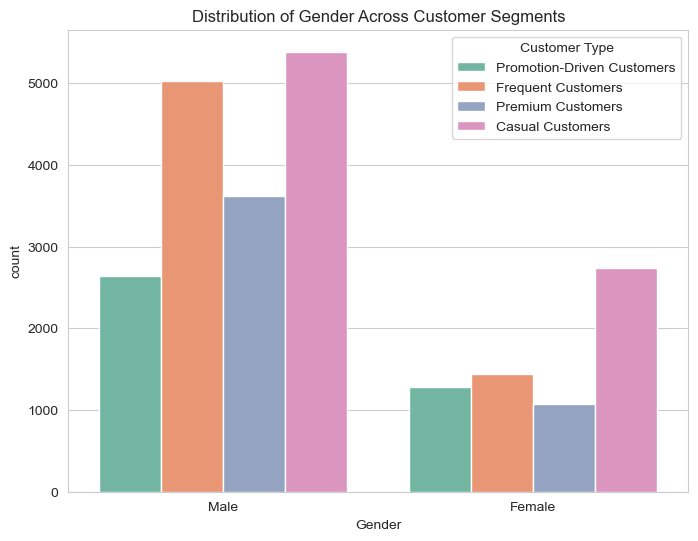

Cluster_Name  Casual Customers  Frequent Customers  Premium Customers  \
Gender                                                                  
Female                    2738                1445               1077   
Male                      5383                5022               3616   

Cluster_Name  Promotion-Driven Customers  
Gender                                    
Female                              1278  
Male                                2634  


In [75]:
#Filtering out unknown gender
filtered_data = Merged_data[Merged_data['Gender'] != 'Unknown']

#Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Cluster_Name', data=filtered_data, palette="Set2")
plt.title('Distribution of Gender Across Customer Segments')
plt.legend(title='Customer Type')
plt.show()

#Group by 'Gender' and 'Cluster_Name' and get the countc
gender_cluster_counts = filtered_data.groupby(['Gender', 'Cluster_Name']).size().unstack()

#Display the counts
print(gender_cluster_counts)

### Insights from the above:

Total Number of Customers by Gender: 
Total number of Female customers: 
2738+1445+1077+1278=6538
Total number of Male customers: 
5383+5022+3616+2634=16655

Even though it's a men's fashion retailer, we can see 6538 women shopping in this brand.

Gender Distribution across Customer Segments: Casual Customers: Female: 2738 Male: 5383, Frequent Customers: Female: 1445 Male: 5022, Premium Customers: Female: 1077 Male: 3616, Promotion-Driven Customers: Female: 1278 Male: 2634

For females, the largest segment is 'Casual Customers', followed by 'Frequent Customers'. For males, while 'Casual Customers' also lead, 'Frequent Customers' and 'Premium Customers' form a significant chunk.

Gender Ratio in each segments: 
Casual Customers: 66.3% Male and 33.7% Female
Frequent Customers: 77.7% Male and 22.3% Female
Premium Customers: 77.1% Male and 22.9% Female
Promotion-Driven Customers: 67.4% Male and 32.6% Female

#### NOTE:

(Digging a little on why female customers would be shopping at a men's fashion retailer). 
    
Noticed that the title column in Demographics_info has Mrs and Miss -> which could categorize as married female customers and unmarried female customers. 

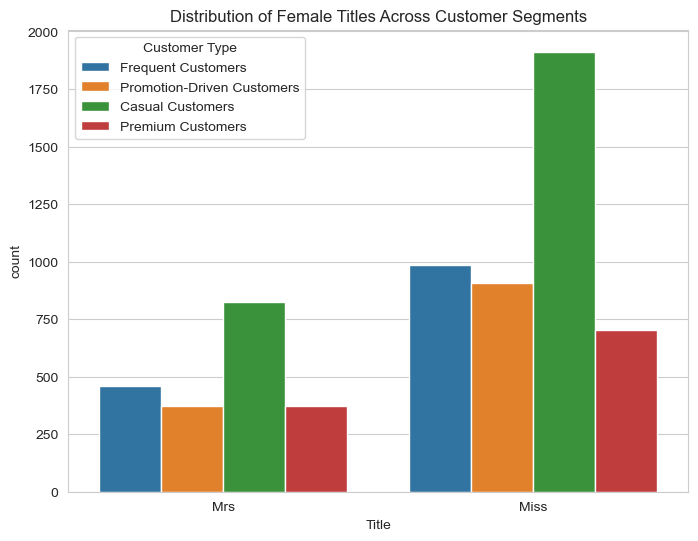

Cluster_Name  Casual Customers  Frequent Customers  Premium Customers  \
Title                                                                   
Miss                      1912                 987                703   
Mrs                        826                 458                374   

Cluster_Name  Promotion-Driven Customers  
Title                                     
Miss                                 906  
Mrs                                  372  


In [86]:
#Filtering for only Mrs and Miss
filtered_data = filtered_data.reset_index(drop=True)
female_data = filtered_data[filtered_data['Title'].isin(['Mrs', 'Miss'])]

#Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='Title', hue='Cluster_Name', data=female_data)
plt.title('Distribution of Female Titles Across Customer Segments')
plt.legend(title='Customer Type')
plt.show()

#Grouping by 'Title' and 'Cluster_Name' and get the count
female_title_cluster_counts = female_data.groupby(['Title', 'Cluster_Name']).size().unstack()

#Displaying the counts
print(female_title_cluster_counts)

### Insights from the above: 

From the above, we can see a clear dominance of unmarried female customers across all customer segments. 

### c. Distribution of Location across the customer segments:

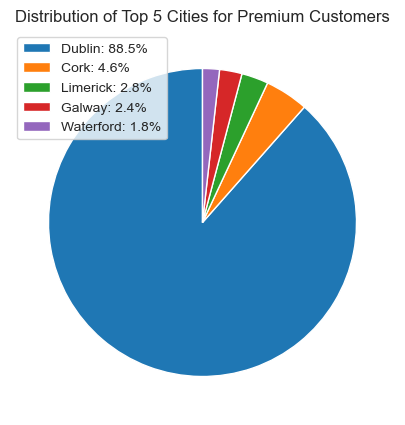

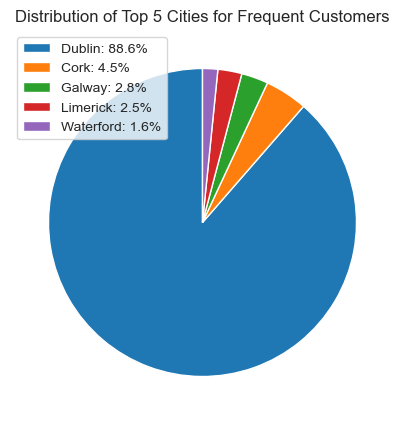

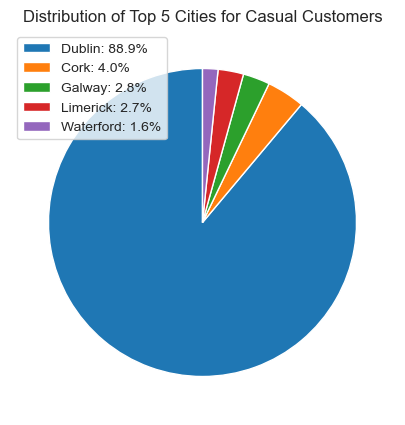

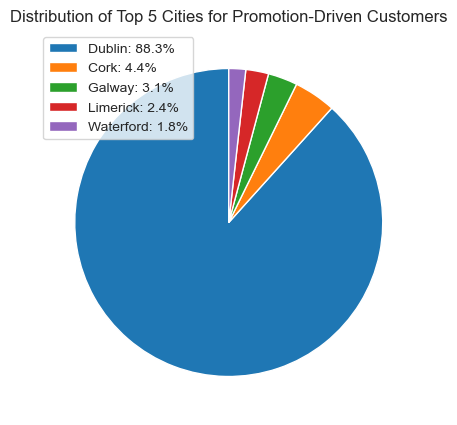

In [77]:
#Defining a function to plot top 5 cities for each cluster
def plot_top_cities(cluster_data, cluster_name):
    city_counts = cluster_data['Address City'].value_counts().head(5)
    plt.figure(figsize=(8, 5))  # Increase figure size for clarity
    
    #Plotting the pie chart without the labels on slices but keep the autopct
    wedges, texts, autotexts = plt.pie(city_counts, autopct='', startangle=90) #%1.1f%%'
    
    #Improving autopct visibility
    for t in autotexts:
        t.set(size=9, weight='bold')
    
    #Adding a legend to the left
    plt.legend(loc='upper left', labels=['%s: %1.1f%%' % (l, s) for l, s in zip(city_counts.index, city_counts/sum(city_counts)*100)])
    
    plt.title(f'Distribution of Top 5 Cities for {cluster_name}')
    plt.show()

#Looping through the clusters and plot the pie charts for top 5 cities
for cluster_label, cluster_name in cluster_names.items():
    cluster_data = Merged_data[Merged_data['Cluster_Label'] == cluster_label]
    plot_top_cities(cluster_data, cluster_name)


### Insights from the above:

Dublin dominates the customer base across all segments, accounting for approximately 88% of customers. Cork consistently comes in second place, with around 4% to 4.6% across the segments. Limerick, Galway, and Waterford follow in that order. 

# IV. (b) Recommendations based on Demographic Differences

1. Based on Age Demographics:

a. Since younger and middle-aged groups are the majority of customers (specially casual and frequent customers), recommend to ensure that the main product line and promotion campaigns appeals to them. 

b. Even though the senior citizen (age group 51+) has fewer numbers, it could be a potential growth segment, hence can be considered as an area of research and experiment. Encourages to offer them senior discount and senior schemes.

2. Based on Gender Demographics:

Despite it being a Men's Fasion Retailer, the brand attracts nearly 30% of it's customers to female customers espically the unmarried female customers. Hence, recommends to tap into unisex fashion to tap on the female market, as female customers constitute significant premium customers.

3. Based on Location Demographics:
  
a. Since the Dublin market captures 88% of customers, strongly recommends customer segment specific campaigns in Dublin (such as premium-exclusive clothing launch for premium customers or special promotional offers for promotional-driven customers).

b. Strengthen presence in Cork and research on Limerick, Galway and Waterford.

# V. (a) Analysis on Customer Behaviour

### a. Order Frequency across the customer segments:

In [78]:
order_frequency = Merged_data.groupby('Cluster')['Subsequent Orders Count'].mean()
print(order_frequency)

Cluster
0    1.279035
1    8.592205
2    1.812785
3    2.814534
Name: Subsequent Orders Count, dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


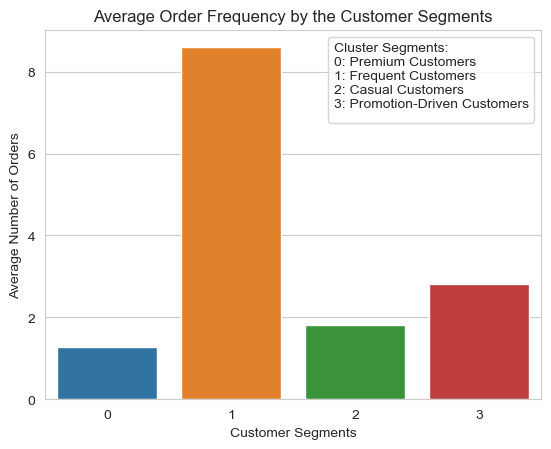

In [79]:
CustomerType = "Cluster Segments:\n0: Premium Customers\n1: Frequent Customers\n2: Casual Customers\n3: Promotion-Driven Customers"
sns.barplot(x=order_frequency.index, y=order_frequency.values)
plt.title('Average Order Frequency by the Customer Segments')
plt.xlabel('Customer Segments')
plt.ylabel('Average Number of Orders')
plt.legend(title=CustomerType)
plt.show()

### Insights from the above:

Premium Customers (Cluster 0):
These customers don't order as frequently, with an average subsequent order count of 1.279. However, when they do order, they contribute significantly to the profit. This group might be buying expensive items.

Frequent Customers (Cluster 1):
They have the highest average subsequent order count of 8.592, making them the most regular shoppers.
Their total profit is also high, but the average order value is lower, indicating they buy more often but spend less per transaction.

Casual Customers (Cluster 2):
With an average subsequent order count of 1.812, they order slightly more frequently than the premium customers.
These customers have a low first order profit and average profit per order, suggesting they may make small or infrequent purchases.

Promotion-Driven Customers (Cluster 3):
These customers have a subsequent order count of 2.814, which is higher than casual and premium customers but lower than frequent customers.
Their feature is the high use of promotions. 

### b. Promotion use across the customer segments:

In [80]:
promotion_use = Merged_data.groupby('Cluster')['Promotion Use Rate'].mean()
print(promotion_use)

Cluster
0    0.675927
1    0.873322
2    0.620387
3    3.308967
Name: Promotion Use Rate, dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


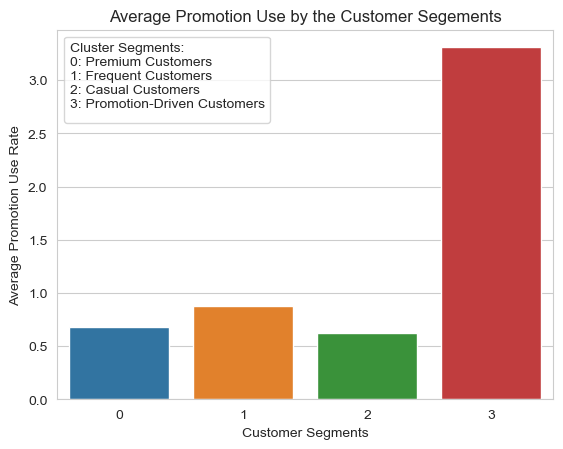

In [81]:
sns.barplot(x=promotion_use.index, y=promotion_use.values)
plt.title('Average Promotion Use by the Customer Segements')
plt.xlabel('Customer Segments')
plt.ylabel('Average Promotion Use Rate')
plt.legend(title=CustomerType)
plt.show()

### Insights from the above:

Premium Customers (Cluster 0): These customers do not order very often, but when they do, the profit per order is good. From the promotion use rate, it appears they use promotions less frequently than other clusters, with an average rate of 0.6759.

Frequent Customers (Cluster 1): These are the customers who order most frequently. They have a moderate use of promotions with a rate of 0.8733.

Casual Customers (Cluster 2): These customers are not very frequent buyers, and they also don't spend a lot when they do make a purchase. Their promotion use rate is the second-lowest at 0.6204, indicating they occasionally benefit from promotions.

Promotion-Driven Customers (Cluster 3): As the group name suggests, these customers promotion use rate is significantly higher than any other segmements at 3.3089. This means that they often order when there's a promotion.

### c. Profit Contribution by the customer segments:

In [82]:
profit_contribution = Merged_data.groupby('Cluster')['Average Profit per Order'].mean()
print(profit_contribution)

Cluster
0    12.897356
1     8.312833
2     4.879817
3     7.064251
Name: Average Profit per Order, dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


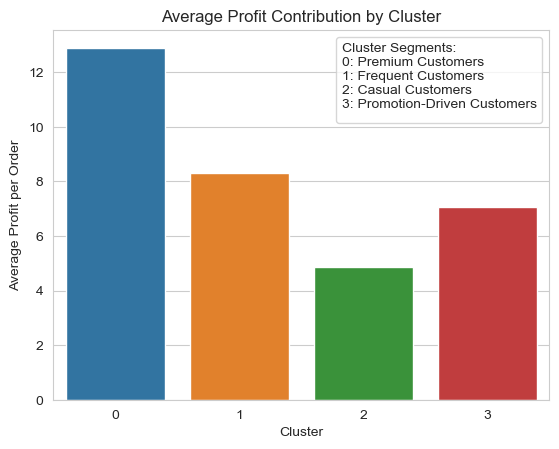

In [83]:
sns.barplot(x=profit_contribution.index, y=profit_contribution.values)
plt.title('Average Profit Contribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Profit per Order')
plt.legend(title=CustomerType)
plt.show()

### Insights from the above:

Premium Customers (Cluster 0): These customers are of high value. Even if they do not order frequently, their contributions are significant in terms of profit when they do.

Frequent Customers (Cluster 1): These customers order often, and while they contribute a high total profit due to their frequent transactions, the value of each transaction might be on the lower side.

Casual Customers (Cluster 2): This cluster represents customers who might contribute the least in terms of order value.| 

Promotion-Driven Customers (Cluster 3): They bring in a moderate profit, they make the most out of promotional offers.

# V. (b) Recommendations based on Customer Behaviour

a. Encourages offering exclusive deals, loyalty programs (to strengthen brand loyalty), or personalized recommendations to engage the premium customer segment as they are the most valuable customers for the company.

b. Since for frequent customers the order frequency is relatively low, recommends bundling products and offering dicsounts for higher order values to increase their average orders. 

c. Engage the causal customers (given their low frequency and average profit per order) with them via newsletters, provide personalized recommendations based on their first purchase, or offer them incentives to come back and shop again.

d. For the promotion-drive customers, recommends to introduce tiered promotions (spend more to save more) to increase average order value and introducing a referral program where they can earn discounts by bringing in new customers.